## Ejemplo de pandas en una DB de dátos biológicos

Usando una base de datos que sacamos de disgenet sobre asociaciones gen-enfermedades armamos un pequeño ejemplo de cosas básicas que podemos hacerle a este set de datos.

Iniciamos importando las librerías que vamos a usar y la base de datos que descargamos.

_OBS_: Podrían también direcamente poner el link en la función `read_csv`, si es que la descargan de internet.

_OBS2_: Aca vamos a abusar del printeo con formato que proveen las notebooks (ipython en general tambien). Así que verán muchas veces que dejamos una variable escrita en el código que luego se printea con un formato cheto.
Esto esta bueno pero tiene sus limitaciones, por ejemplo solo podes printear una cosa por celda de esta manera.
Nada reemplaza al queridisimo `print`

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

disgenet_data = pd.read_csv('braindiseases_data.csv')

# Mostramos toda la data
disgenet_data

# Mostramos las primeras entradas:
# disgenet_data.head()

# Mostramos el numero total de entradas entradas:
# print(f"Numero filas: {len(disgenet_data)}")

,Gene,Gene_id,Disease,Disease_id,Score_gda,Association_Type
0,AVP,551,Amnesia,C0002622,0.30,Therapeutic
1,IL6,3569,Amnesia,C0002622,0.31,Therapeutic
2,HRH3,11255,Amnesia,C0002622,0.51,Biomarker
3,IL2,3558,Amnesia,C0002622,0.30,Biomarker
4,POMC,5443,Amnesia,C0002622,0.30,Biomarker
...,...,...,...,...,...,...
28566,PRF1,5551,Fatal post-viral neurodegenerative disorder,C4751597,0.30,GermlineCausalMutation
28567,MPZ,4359,Autosomal dominant intermediate Charcot-Marie-...,C4755257,0.30,GermlineCausalMutation
28568,CD59,966,Primary CD59 deficiency,C4755276,0.30,Biomarker
28569,FASTKD2,22868,FASTKD2-related infantile mitochondrial enceph...,C4755278,0.30,GermlineCausalMutation


Podemos, si queremos, ver un resumen rapido de las columnas, usando la función `describe`.
Esta función a a mostrarlos algunas  estadísticas matemáticas de dataset, asi que no va a mostrar nada de las columnas que contienen datos tipo string (i.e. cadenas de caracteres).

Verán que tambien hace estadística sobre la columna `Gene_Id`, esto claramente está mal.
No nos interesa esa variable de esa forma, pero bueno, Pandas no sabe distinguir qué variable es relevante para nuestros análisis o no.

Ahí es donde empieza el trabajo suyo.

In [10]:
disgenet_data.describe()

,Gene_id,Score_gda
count,2.857100e+04,28571.000000
mean,3.609076e+05,0.372462
std,5.775471e+06,0.154386
min,1.000000e+00,0.300000
25%,2.629000e+03,0.300000
50%,5.376000e+03,0.300000
75%,1.028000e+04,0.330000
max,1.037535e+08,1.000000


La columna `Score_gda` si tiene alguna importancia para nosotros.
Es la que va a decirnos qué tan fiable es cada entrada del dataset.
Seguramente la gente que sepa de biología entenderá mucho más sobre la relevancia de este parámetro, pero por ahora nos quedamos con la idea de que mientras mayor sea, indica una mayor fiabilidad de la asignación gen-enfermedad correspondiente.

El `describe` nos da un poco de información, pero uno podría querer extraerla para verla mas en detalle.
Veamos como extraemos los valores de una columna:

In [13]:
# En general vamos a acceder a las columnas como dataframe['columna']
# entonces para sacar la Score_gda de disgenet_data podemos hacer:
# disgenet_data['Score_gda']
#
# Para sacar solo los valores de adentro podemos hacer:
score_values = disgenet_data['Score_gda'].values

print(score_values)
print(f"# de entradas: {len(score_values)}")
print(f"Tipo: {type(score_values)}")

[0.3  0.31 0.51 ... 0.3  0.3  0.3 ]
# de entradas: 28571
Tipo: <class 'numpy.ndarray'>


Fijense que extraimos todos los datos y lo guardo en un array de numpy!!!

Acá ya estamos como queremos, porque vimos en la clase un montón de cosas que se pueden hacer con los arrays estos.

Por ejemplo, podemos ver su distribución con un histograma:

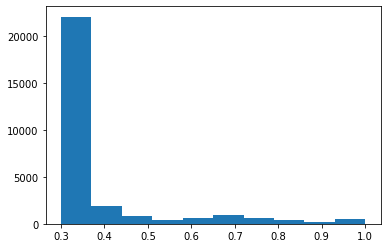

In [15]:
_ = plt.hist(disgenet_data['Score_gda'].values)

Vemos que hay una bocha de datos que son reee poco fiables.
Algo facil entonces que podesmos querer hacer es filtrar los datos y quedarnos solamente con aquellos que tienen un score bien alto, por ejemplo mayor que 0.7

In [21]:
# Aca vamos a usar la función loc (locate) de pandas.
# basicamente uno le da una condicion y retorna las filas que cumplen la condicion esa
disgenet_cortado = disgenet_data.loc[disgenet_data['Score_gda'] > 0.7]
disgenet_cortado

,Gene,Gene_id,Disease,Disease_id,Score_gda,Association_Type
658,UBR1,197131,Johanson-Blizzard syndrome,C0175692,1.00,GermlineCausalMutation
659,UBR1,197131,Johanson-Blizzard syndrome,C0175692,1.00,GeneticVariation
660,UBR1,197131,Johanson-Blizzard syndrome,C0175692,1.00,Biomarker
689,ANKRD11,29123,KBG syndrome,C0220687,0.80,Biomarker
690,ANKRD11,29123,KBG syndrome,C0220687,0.80,GermlineCausalMutation
...,...,...,...,...,...,...
28472,EGR2,1959,"NEUROPATHY, CONGENITAL HYPOMYELINATING, 1, AUT...",C4721436,0.80,GeneticVariation
28540,ASS1,445,Citrullinemia Type 1,C4721769,0.80,Biomarker
28541,ASS1,445,Citrullinemia Type 1,C4721769,0.80,GeneticVariation
28542,MFN2,9927,"CHARCOT-MARIE-TOOTH DISEASE, AXONAL, AUTOSOMAL...",C4721887,0.81,GeneticVariation


Fijense cómo se recortó los datos!!! 

Pasamos de tener 28571 entradas a solamente 1982.

A esto se le llama en la jerga popular como "hachar los datos" o bien "pasarle con la motosierra"

Luego de destruir el 90\% de los datos, una pregunta más que razonable es: ¿Qué cosas quedaron vivas?

Para eso podemos ver, por ejemplo qué tipos de asociaciones sobrevivieron la purga.

In [37]:
# Aca vamos a usar la funcion 'unique', para que solo muestre las asociaciones distintas
# que aparecen, y no repita cien veces cada una
print( disgenet_cortado['Association_Type'].unique() )

['GermlineCausalMutation' 'GeneticVariation' 'Biomarker'
 'ChromosomalRearrangement' 'SusceptibilityMutation' 'Therapeutic'
 'GenomicAlterations' 'SomaticCausalMutation' 'CausalMutation'
 'GermlineModifyingMutation']


Tarea para ustedes es verificar que efectivamente hemos perdido algunos tipos de asociación en el recorte de datos (de paso pueden ver cuáles perdimos, y explicarnos si tiene sentido haber perdido esas, porque nosotros no tenemos ni idea).

Para finalizar podemos ver como se distribuyen los tipos de asociación.
Osea, de qué asociacion hay más o menos.
Esto se logra fácil con la función `groupby`

In [38]:
disgenet_cortado.groupby("Association_Type").count()

,Gene,Gene_id,Disease,Disease_id,Score_gda
Association_Type,,,,,
Biomarker,850,850,850,850,850
CausalMutation,3,3,3,3,3
ChromosomalRearrangement,8,8,8,8,8
GeneticVariation,639,639,639,639,639
GenomicAlterations,2,2,2,2,2
GermlineCausalMutation,464,464,464,464,464
GermlineModifyingMutation,1,1,1,1,1
SomaticCausalMutation,7,7,7,7,7
SusceptibilityMutation,3,3,3,3,3


In [39]:
# Si solo queremos ver una columna del output:
disgenet_cortado.groupby("Association_Type")['Gene'].count()

Association_Type
Biomarker                    850
CausalMutation                 3
ChromosomalRearrangement       8
GeneticVariation             639
GenomicAlterations             2
GermlineCausalMutation       464
GermlineModifyingMutation      1
SomaticCausalMutation          7
SusceptibilityMutation         3
Therapeutic                    5
Name: Gene, dtype: int64

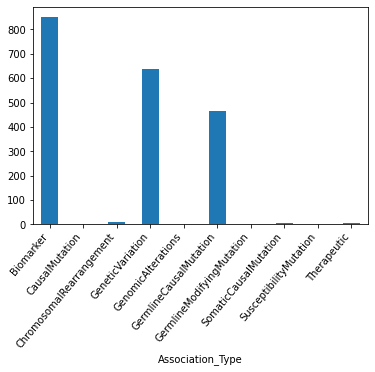

In [78]:
# Si lo quieren ver en forma de grafico de barras. Aquí esta para ustedes:
asoc_types = disgenet_cortado.groupby("Association_Type")['Gene'].count()
ax = asoc_types.plot.bar()

# Aca le roto un poco los ticks, 
for tick in ax.get_xticklabels():
    tick.set_ha('right')
    tick.set_rotation(50)